In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [5]:
df= pd.read_csv(r"C:\Users\Mohamed\Downloads\transfusion.csv")
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Donate
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Recency (months)       748 non-null    int64
 1   Frequency (times)      748 non-null    int64
 2   Monetary (c.c. blood)  748 non-null    int64
 3   Time (months)          748 non-null    int64
 4   Donate                 748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [8]:
df.duplicated().sum()

215

In [11]:
df.drop_duplicates(inplace=True)

In [15]:
df.isnull().sum()

Recency (months)         0
Frequency (times)        0
Monetary (c.c. blood)    0
Time (months)            0
Donate                   0
dtype: int64

In [16]:
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Donate
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


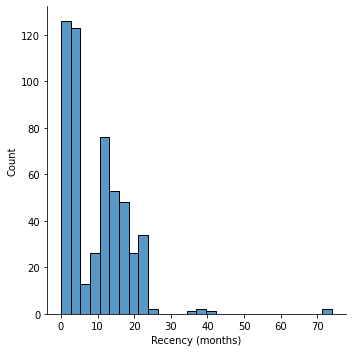

In [17]:
sns.displot(data=df, x="Recency (months)")

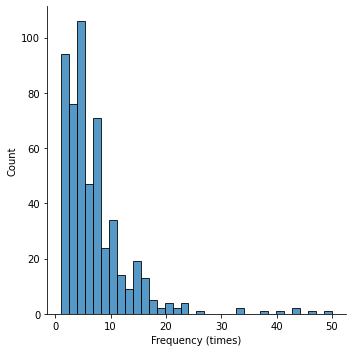

In [18]:
sns.displot(data=df, x="Frequency (times)")

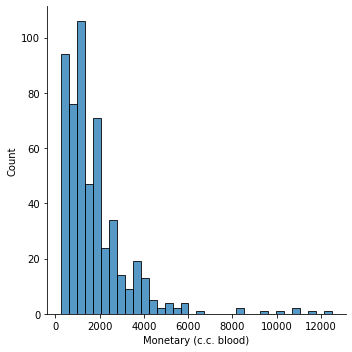

In [19]:
sns.displot(data=df, x="Monetary (c.c. blood)")

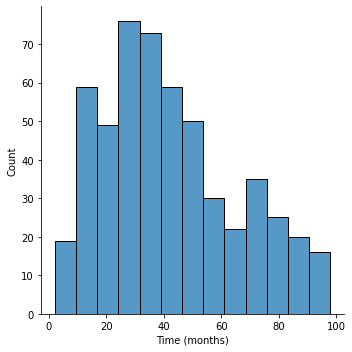

In [20]:
sns.displot(data=df, x="Time (months)")

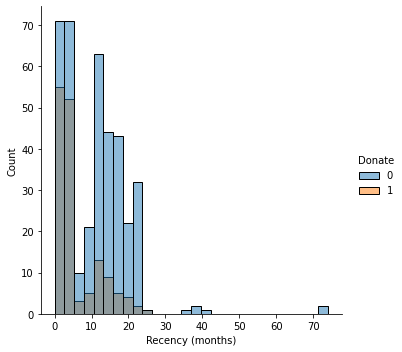

In [23]:
sns.displot(data=df, x="Recency (months)", hue="Donate")

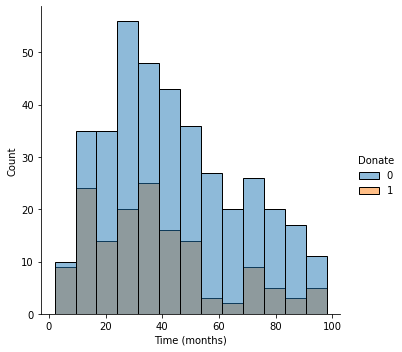

In [26]:
sns.displot(data=df, x="Time (months)", hue="Donate")

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x= df.drop("Donate",axis=1)
y= df["Donate"]

In [29]:
x_train, x_test, y_train, y_test= train_test_split(x,y,stratify=y, test_size=0.20, random_state=7)

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler= StandardScaler()

In [33]:
df.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'Donate'],
      dtype='object')

In [34]:
columns_to_be_scaled= ['Recency (months)','Frequency (times)','Monetary (c.c. blood)','Time (months)']

In [36]:
x_train[columns_to_be_scaled] = scaler.fit_transform(x_train[columns_to_be_scaled])
x_test[columns_to_be_scaled] = scaler.transform(x_test[columns_to_be_scaled])

<ipython-input-36-4adb9d3d9dcb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[columns_to_be_scaled] = scaler.fit_transform(x_train[columns_to_be_scaled])
C:\Users\Mohamed\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-36-4adb9d3d9dcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [38]:
x_train

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
651,0.765637,-0.315370,-0.315370,-0.648531
392,-0.645808,-0.810509,-0.810509,0.727465
696,0.530396,-0.645463,-0.645463,-0.304532
466,1.588980,-0.480416,-0.480416,0.125467
285,0.177535,-0.810509,-0.810509,-1.207529
...,...,...,...,...
343,0.177535,-0.975555,-0.975555,-1.336529
470,1.588980,-0.315370,-0.315370,0.684465
269,0.412776,-0.480416,-0.480416,-0.906530
206,-0.881048,-0.810509,-0.810509,-1.121530


In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
model = KNeighborsClassifier()

In [48]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [49]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score , confusion_matrix , ConfusionMatrixDisplay

In [51]:
print("Train accuracy is " , accuracy_score(y_train , y_train_pred))
print("Test accuracy is " , accuracy_score(y_test , y_test_pred))

Train accuracy is  0.795774647887324
Test accuracy is  0.6635514018691588
